In [1]:
from utils import *
from layers import *
from model import LeNet5
from train import train

In [2]:
train_X, train_y, test_X, test_y = load_mnist("MNIST")
train_X, test_X = prepare_for_neural_network(train_X, test_X)

train_X = train_X.reshape(-1, 1, 28, 28)
test_X = test_X.reshape(-1, 1, 28, 28)
train_y = one_hot_encoding(train_y)
test_y = one_hot_encoding(test_y)

train_X, train_y, val_X, val_y = random_split_train_val(
    train_X, train_y, percent_val=0.3
)

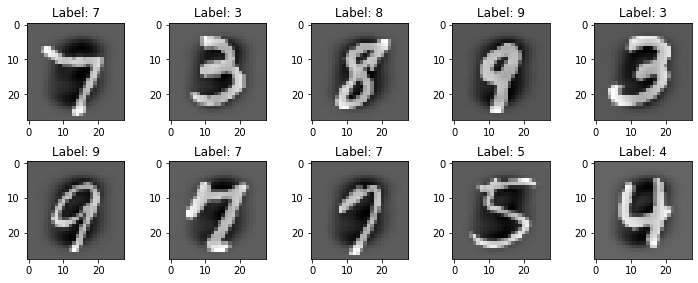

In [3]:
show_batch(train_X, train_y)

In [4]:
BATCH_SIZE = 64
EPOCHS = 4

model = LeNet5()
loss = CrossEntropyLoss()

optimizer = AdamGD(
    lr=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, params=model.get_params()
)

dataset = Dataset(train_X, train_y, val_X, val_y)
history = train(model, dataset, loss, optimizer, BATCH_SIZE, EPOCHS)

[Train] Epoch 1: 100%|██████████| 656/656 [01:45<00:00,  6.19it/s]


train-loss: 30.143164 | train-acc: 0.860
Elapsed time for epoch 1: 1.7657032527666665 min.


[Val] Epoch 1: 100%|██████████| 281/281 [00:07<00:00, 36.03it/s]


val-loss: 12.024025 | val-acc: 0.942


[Train] Epoch 2: 100%|██████████| 656/656 [01:58<00:00,  5.56it/s]


train-loss: 9.451545 | train-acc: 0.956
Elapsed time for epoch 2: 1.9678600618 min.


[Val] Epoch 2: 100%|██████████| 281/281 [00:09<00:00, 29.59it/s]


val-loss: 8.028328 | val-acc: 0.961


[Train] Epoch 3: 100%|██████████| 656/656 [02:08<00:00,  5.12it/s]


train-loss: 6.736640 | train-acc: 0.969
Elapsed time for epoch 3: 2.135918984716666 min.


[Val] Epoch 3: 100%|██████████| 281/281 [00:08<00:00, 33.20it/s]


val-loss: 6.482816 | val-acc: 0.968


[Train] Epoch 4: 100%|██████████| 656/656 [02:02<00:00,  5.36it/s]


train-loss: 5.382334 | train-acc: 0.975
Elapsed time for epoch 4: 2.0409499708333327 min.


[Val] Epoch 4: 100%|██████████| 281/281 [00:07<00:00, 35.78it/s]

val-loss: 5.778839 | val-acc: 0.970


Evaluation: 100%|██████████| 625/625 [00:07<00:00, 84.80it/s] 


test-loss: 1.304372 | test-acc: 0.974


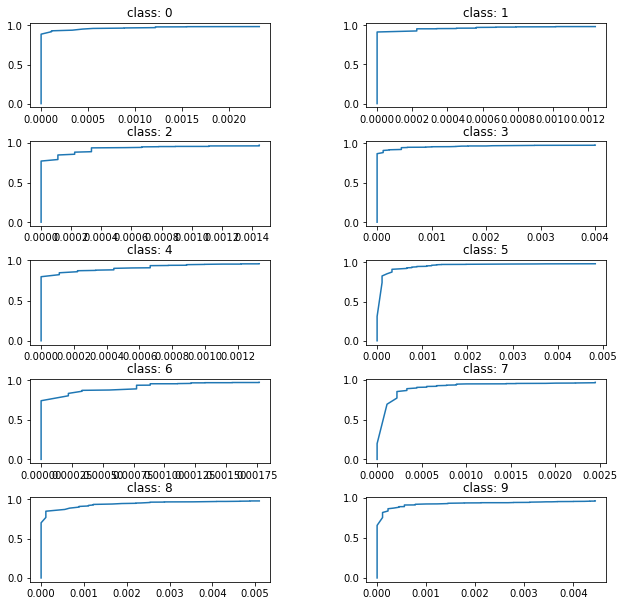

In [5]:
from metrics import Metrics
Test = Metrics(test_X, test_y)

Test.test(model, loss)
Test.ROC_AUC()